In [1]:
import pandas

%matplotlib inline
from matplotlib.pyplot import figure
from seaborn import lineplot, barplot, color_palette, set_palette

In [2]:
def extract_table_rows(city_html):
    from bs4 import BeautifulSoup
    with open(r'C:\Users\Sam\Python\H1B-Orlando\H1B Visa Salary Database 2019 - By Employer, Job, or City - Orlando.html') as fp:
        html = BeautifulSoup(fp.read(), 'lxml')
    return html.find_all('tr')

# Pick a city: Orlando
city, city_name = 'orl', "Orlando"

# Use `extract_table_rows` to get the table data
rows = extract_table_rows(f"{city}.html")
print(f"The table for {city_name} (`{city}.html`) has {len(rows)} rows, including the header.")
print(f"The returned object, `rows`, has type `{type(rows)}`.")

The table for Orlando (`orl.html`) has 1269 rows, including the header.
The returned object, `rows`, has type `<class 'bs4.element.ResultSet'>`.


In [3]:
def inspect_html_table_row(row, frontmatter=None):
    if frontmatter is not None:
        print(frontmatter)
    cols = list(row)
    for col_num, col in enumerate(cols):
        print("[{}] '{}'".format(col_num, col.text))
        print("  - Type: {}".format(type(col)))
        print("  - Raw HTML: '{}'".format(str(col)))

header = rows[0]
inspect_html_table_row(header, frontmatter="=== HEADER ===\n") # Header row

=== HEADER ===

[0] 'EMPLOYER'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>EMPLOYER</th>'
[1] 'JOB TITLE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>JOB TITLE</th>'
[2] 'BASE SALARY'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>BASE SALARY</th>'
[3] 'LOCATION'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>LOCATION</th>'
[4] 'SUBMIT DATE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th data-date-format="mm/dd/yy">SUBMIT DATE</th>'
[5] 'START DATE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th data-date-format="mm/dd/yy">START DATE</th>'
[6] 'CASE STATUS'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>CASE STATUS</th>'


In [4]:
first_data_row = rows[1]
inspect_html_table_row(first_data_row, frontmatter="=== FIRST DATA ROW (`rows[1]`) ===\n")

=== FIRST DATA ROW (`rows[1]`) ===

[0] 'LANCESOFT INC'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=LANCESOFT+INC&amp;job=&amp;city=ORLANDO&amp;year=2019">LANCESOFT INC</a></td>'
[1] '.NET DEVELOPER'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=.NET+DEVELOPER&amp;city=ORLANDO&amp;year=2019">.NET DEVELOPER</a></td>'
[2] '63,000'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>63,000</td>'
[3] 'ORLANDO, FL'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=&amp;city=ORLANDO&amp;year=2019">ORLANDO, FL</a></td>'
[4] '05/22/2019'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>05/22/2019</td>'
[5] '05/30/2019'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>05/30/2019</td>'
[6] 'CERTIFIED'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>CERTIFIED</td>'


In [5]:
last_data_row = rows[-1]
inspect_html_table_row(last_data_row, frontmatter="=== LAST DATA ROW (`rows[-1]`) ===\n")

=== LAST DATA ROW (`rows[-1]`) ===

[0] 'UNITED STATES TENNIS ASSOCIATION INCORPORATED (USTA)'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=UNITED+STATES+TENNIS+ASSOCIATION+INCORPORATED+%28USTA%29&amp;job=&amp;city=ORLANDO&amp;year=2019">UNITED STATES TENNIS ASSOCIATION INCORPORATED (USTA)</a></td>'
[1] 'YOUTH COMPETITION MANAGER'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=YOUTH+COMPETITION+MANAGER&amp;city=ORLANDO&amp;year=2019">YOUTH COMPETITION MANAGER</a></td>'
[2] '58,350'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>58,350</td>'
[3] 'ORLANDO, FL'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=&amp;city=ORLANDO&amp;year=2019">ORLANDO, FL</a></td>'
[4] '04/24/2019'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>04/24/2019</td>'
[5] '06/16/2019'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>06/16/2019</td>'
[6] 'CERTIFIED'
  - Type: <class 'bs4

In [6]:
def raw_rows_to_pandas(rows):
    final = []
    for x in rows:
        row_data = list(x)
        row = []
        for col_num, col in enumerate(row_data):
            row.append(col.text)
        final.append(row)
    final_df = pandas.DataFrame(final)
    final_df = final_df[final_df[6] == 'CERTIFIED']
    final_df = final_df.iloc[:,0:5]
    final_df = final_df.rename(columns = {0:'EMPLOYER',1:'JOB TITLE',2:'BASE SALARY',3:'LOCATION',4:'YEAR'})
    
    final_df['BASE SALARY'] = final_df['BASE SALARY'].str.replace(',', '').astype(int)
    final_df['YEAR'] = pandas.to_datetime(final_df['YEAR'],format = '%m/%d/%Y')
    final_df['YEAR'] = final_df['YEAR'].dt.to_period('Y')
    final_df['YEAR'] = final_df['YEAR'].astype(str)
    final_df['YEAR'] = final_df['YEAR'].astype(int)
    
    return final_df
    
# Demo:
orl = raw_rows_to_pandas(rows[1:])
print("Found", len(orl), "rows")
orl.sample(5)

Found 1205 rows


,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,YEAR
640,PCL CONSTRUCTION SERVICES INC,PROJECT ENGINEER,70678,"ORLANDO, FL",2019
849,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,SENIOR SYSTEMS ANALYST JC60,73736,"ORLANDO, FL",2019
8,CONTROL LASER CORPORATION,ACCOUNTANT,51002,"ORLANDO, FL",2019
396,SIEMENS CORPORATION,INTELLECTUAL PROPERTY PROFESSIONAL,143033,"ORLANDO, FL",2019
867,ADVANCED MICRO DEVICES INC,SILICON DESIGN ENGINEER,78312,"ORLANDO, FL",2019


In [7]:
orl_job_titles = orl['JOB TITLE'].unique()
print(f"There are {len(orl_job_titles)} unique job titles in the Atlanta dataset.")
print(f"They are:\n{orl_job_titles}")

There are 530 unique job titles in the Atlanta dataset.
They are:
['.NET DEVELOPER' '2ND ASSISTANT SUPERINTENDENT' 'ACCOUNTANT'
 'ACCOUNTANT II' 'ACCOUNTANTS AND AUDITORS' 'ACM DEVELOPER'
 'ACUPUNCTURIST' 'ADJUNCT PROFESSOR' 'ADVANCED SOFTWARE DEVELOPER'
 'ADVISORY ASSOCIATE' 'ADVISORY MANAGER' 'ADVISORY SENIOR ASSOCIATE'
 'ANALYST' 'ANALYST III' 'ANALYST, INTERNATIONAL TAX'
 'ANALYTICAL STRATEGIST - HR' 'ANALYTICS AND INSIGHTS ANALYST'
 'ANDROID DEVELOPER' 'APPLICATION DEVELOPER'
 'APPLICATION DEVELOPMENT ENGINEER' 'APPLICATION ENGINEER'
 'APPLICATIONS ARCHITECT - DIGITAL PLATFORM' 'APPLICATIONS CONSULTANT 2'
 'APPLICATIONS CONSULTANT 3'
 'APPLICATIONS DEVELOPER, BUSINESS INTELLIGENCE' 'ARCHITECT'
 'ARCHITECTURAL DESIGNER' 'ARCHITECTURAL DRAFTER'
 'AREA SALES MANAGER- OPEN MARKET' 'ASIC DESIGN ENGINEER'
 'ASSISTANT DEAN ACADEMIC PLANNING' 'ASSISTANT ENGINEER'
 'ASSISTANT IN BIOMEDICAL RESEARCH' 'ASSISTANT NURSE MANAGER'
 'ASSISTANT PROFESSOR' 'ASSISTANT PROFESSOR OF MEDICINE'
 'ASSIST

In [8]:
def subset_series_str(s, pattern):
    """Given a Series object, `s`, returns the subset containing the regular expression `pattern`."""
    from pandas import Series
    if not isinstance(s, Series):
        s = Series(s) # Attempt to convert...
    return s[s.str.contains(pattern)]

In [54]:
def filter_jobs(df, target_jobs):
    from pandas import DataFrame
    assert isinstance(df, DataFrame), f"`df` has type `{type(df)}` rather than `DataFrame`."
    assert df.columns.contains('JOB TITLE'), f"`df` does not have a `'JOB TITLE'` column."
    assert all([isinstance(j, str) for j in target_jobs]), f"All entries of `target_jobs` should be strings."
    
    keep_job = df['JOB TITLE'].str.contains('|'.join(target_jobs))
    return df[keep_job]

# Demo: The following should yield only the four target job titles.
target_job_list = ['DATA ANALYST', 'BUSINESS ANALYST', 'DATA SCIENTIST', 'FINANCIAL ANALYST']
orl_target_jobs = filter_jobs(orl, target_job_list)

In [55]:
orl_target_jobs

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,YEAR
122,ALLSCRIPTS HEALTHCARE LLC,ASSOCIATE BUSINESS ANALYST,61797,"ORLANDO, FL",2019
125,ALLSCRIPTS HEALTHCARE LLC,ASSOCIATE DATA SCIENTIST,55000,"ORLANDO, FL",2019
143,GENWORTH NORTH AMERICA CORPORATION,"ASSOCIATE, DATA ANALYST",78400,"ORLANDO, FL",2019
162,MASSEY SERVICES INC,BUSINESS ANALYST,46000,"ORLANDO, FL",2019
163,SYNTEL INC,BUSINESS ANALYST,74820,"ORLANDO, FL",2019
164,ANJANEYAP INC,BUSINESS ANALYST BUSINESS INTELLIGENCE ANALYST,63000,"ORLANDO, FL",2019
165,MAXIM ZENWISE OPCO LLC,BUSINESS DATA ANALYST,62546,"ORLANDO, FL",2019
254,MOSS & ASSOCIATES LLC,DATA ANALYST,43000,"ORLANDO, FL",2019
255,ELECTRONIC ARTS INC,DATA ANALYST,69000,"ORLANDO, FL",2019
256,CAPGEMINI AMERICA INC,DATA ANALYST 2,60000,"ORLANDO, FL",2019


In [50]:
def normalize_series(s, target):
    from pandas import Series
    assert isinstance(s, Series), f"Object `s` has type `{type(s)}`, not `Series`."
    assert isinstance(target, str), f"`target` is a `{type(target)}`, not a string."
    
    return s.str.replace('.*' + target + '.*', target)

In [57]:


def reduce_jobs(df, target_jobs = target_job_list):
    df_reduced = df.copy()
    for title in target_jobs:
        df_reduced['JOB TITLE'] = normalize_series(df_reduced['JOB TITLE'], title)
    return df_reduced

orl_reduced = reduce_jobs(orl)
orl_reduced2 = orl_reduced.loc[orl_reduced['JOB TITLE'].isin(target_job_list)]
orl_reduced2

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,YEAR
122,ALLSCRIPTS HEALTHCARE LLC,BUSINESS ANALYST,61797,"ORLANDO, FL",2019
125,ALLSCRIPTS HEALTHCARE LLC,DATA SCIENTIST,55000,"ORLANDO, FL",2019
143,GENWORTH NORTH AMERICA CORPORATION,DATA ANALYST,78400,"ORLANDO, FL",2019
162,MASSEY SERVICES INC,BUSINESS ANALYST,46000,"ORLANDO, FL",2019
163,SYNTEL INC,BUSINESS ANALYST,74820,"ORLANDO, FL",2019
164,ANJANEYAP INC,BUSINESS ANALYST,63000,"ORLANDO, FL",2019
165,MAXIM ZENWISE OPCO LLC,DATA ANALYST,62546,"ORLANDO, FL",2019
254,MOSS & ASSOCIATES LLC,DATA ANALYST,43000,"ORLANDO, FL",2019
255,ELECTRONIC ARTS INC,DATA ANALYST,69000,"ORLANDO, FL",2019
256,CAPGEMINI AMERICA INC,DATA ANALYST,60000,"ORLANDO, FL",2019


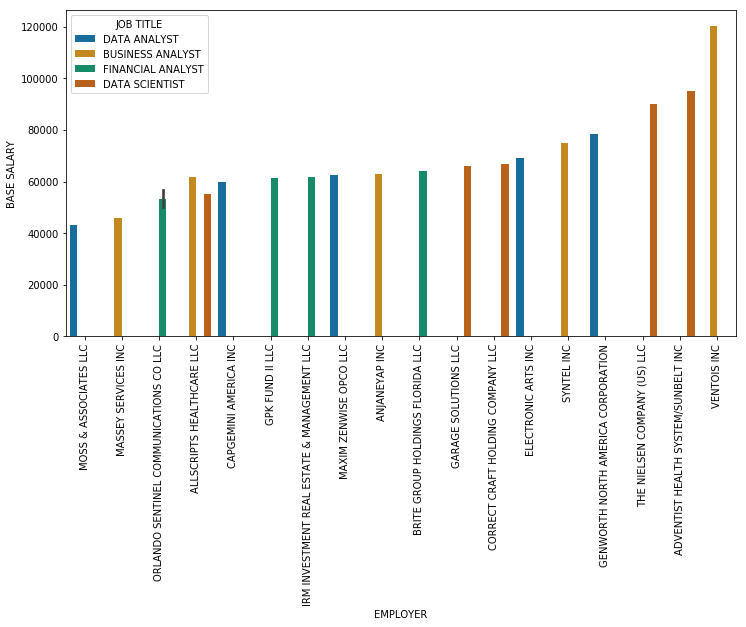

In [76]:
fig = figure(figsize=(12, 6))
orl_reduced_reordered = orl_reduced2.sort_values(by=['BASE SALARY'])
my_chart = barplot(x='EMPLOYER', y='BASE SALARY', hue='JOB TITLE', data=orl_reduced_reordered)
set_palette(color_palette('colorblind'))
for item in my_chart.get_xticklabels():
    item.set_rotation(90)
my_chart

In [77]:
orl['EMPLOYER'].unique()

array(['LANCESOFT INC', 'TECH RAKERS INC', 'TBHC INC',
       'SUN OIL TRUCKING LLC', 'PRITHI DASWANI CPA PL',
       'CONTROL LASER CORPORATION', 'N&A BUSINESS SERVICES LLC',
       "JJ'S WASTE & RECYCLING LLC",
       'ADVENTIST HEALTH SYSTEM/SUNBELT INC', 'ERNST & YOUNG US LLP',
       'AMORIS IT INC', 'HOLISTIC HEALTH INC',
       'UNIVERSIDAD POLITECNICA DE PUERTO RICO', 'KFORCE INC',
       'PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC',
       'TATA CONSULTANCY SERVICES LIMITED', 'GLOBAL ASSET RENTAL LLC',
       'DART INDUSTRIES INC', 'NATIONAL RADIOLOGY SOLUTIONS LLC',
       'ORLANDO MAGIC LTD', 'SOFTNICE INC', 'SYSINTELLI INC',
       'CIBER GLOBAL LLC', 'TWO95 INTERNATIONAL',
       'VISTA APPLIED SOLUTIONS GROUP INC', 'DARDEN CORPORATION',
       'CAPGEMINI AMERICA INC', 'CHEP USA',
       'METRO ARCHITECTURE PARTNERSHIP INC',
       'EAGLE VISION ENTERTAINMENT STUDIO INC', 'HHCP INC',
       'SIEMENS ENERGY INC', 'APPLE INC', 'UNIVERSITY OF CENTRAL FLORIDA',
       'TURNE